

<hr>

<b>Objetivo:</b> Evaluar el deterioro cognitivo en las personas.



<hr>
<center><b>RECOLECTAR LOS DATOS</b></center>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Importando los datos.
data = pd.read_excel('/content/BASE-PARTE 2-M2A.xlsx')

In [ ]:
# Realizando una copia en memoria de los datos.
df = data.copy()

In [ ]:
# Creando una funcion para obtener un diccionario de datos basado en las columnas de df original.
def get_dic_datos(nombres_columnas):
  dic_datos = {}
  cont = 1
  for col in nombres_columnas:
    clave = re.sub(r'[^a-zA-Z]', '', col.title())[:10]+f'C{cont}'
    cont += 1
    dic_datos[clave] = col

  return dic_datos

dic_datos = get_dic_datos(data.columns)

In [ ]:
# Exportando el diccionario de datos del df original.
def exportar_diccionario(dic_datos, ruta):
  with open(ruta, 'w') as archivo:
    for clave, valor in dic_datos.items():
      archivo.write(f"{clave}: {valor}\n")

  print("Diccionario exportado correctamente!")


exportar_diccionario(dic_datos, '/content/dicdatosOrig.txt')

Diccionario exportado correctamente!


<hr>
<center><b>EXPLORACIÓN LOS DATOS</b></center>

In [ ]:
# Renombrando las columnas y explorando los datos con .head()
df.columns = dic_datos.keys()
df.head()

,EstadoC1,NombresYApC2,CdigoDelSuC3,EdadC4,ProfesionC5,SexoC6,EstadoCiviC7,LateralidaC8,DficitSensC9,EnfermedadC10,...,MedicionEfC350,TareasAlexC351,MedicionEfC352,TiempoCodaC353,MedicionEfC354,TareasAlexC355,MedicionEfC356,TiempoCodaC357,MedicionEfC358,FirmaDeConC359
0,APTO-V1,Gomez Coello Saida Ruth,ECU-ISTA-E-056,66,ama de casa,Mujer,Casado/a,Diestro,Ninguno,NaN,...,NaN,8,200,15,NaN,4,NaN,NaN,NaN,NaN
1,APTO-V1,LOJANO VILLA ROGELIO JAIME,ECU-ISTA-E-058,78,agricultor,Hombre,Viudo/a,Diestro,Ninguno,NaN,...,NaN,8,200,13,NaN,4,NaN,NaN,NaN,NaN
2,APTO-V1,LOPEZ MORA NINFA PIEDAD,ECU-ISTA-E-090,73,ama de casa,Hombre,Viudo/a,Diestro,Ninguno,NaN,...,NaN,3,75,10,NaN,4,NaN,NaN,NaN,NaN
3,APTO-V1,HERRERA ESCANDON CLARA NOHEMI,ECU-ISTA-E-091,70,ama de casa,Mujer,Viudo/a,Diestro,Ninguno,NaN,...,NaN,4,100,9,NaN,6,NaN,NaN,NaN,0.0
4,APTO-V1,MAITA MANUEL SALVADOR,ECU-ISTA-E-098,67,albanil,Hombre,Casado/a,Diestro,Ninguno,NaN,...,NaN,3,75,15,NaN,2,NaN,NaN,NaN,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Columns: 359 entries, EstadoC1 to FirmaDeConC359
dtypes: float64(28), int64(309), object(22)
memory usage: 168.4+ KB


In [ ]:
num_filas, num_columnas = df.shape
print(f'\nEl DataFrame tiene {num_filas} filas y {num_columnas} columnas\n')


El DataFrame tiene 60 filas y 359 columnas



In [ ]:
def get_info_nulos(df):
  info_nulos = df.isnull().sum()
  return info_nulos[info_nulos > 0].sort_values(ascending=False)


get_info_nulos(df)

,0
C324,60
MedicionEfC358,60
TiempoCodaC357,60
MedicionEfC356,60
MedicionEfC354,60
MedicionEfC350,60
MedicionEfC346,60
UnnamedC326,60
EnfermedadC10,57
EscribirSiC11,56


<hr>
<center><b>PREPROCESAMIENTO DE DATOS</b></center>

In [ ]:
# Eliminando columnas que tienen mas del 20% de valores nulos.
columnas_a_eliminar = []
for col in df.columns:
  porcentaje = df[col].isnull().sum()
  if  porcentaje > 20:
    columnas_a_eliminar.append(col)
    print(f'Eliminando columna {dic_datos[col]}:\n{porcentaje}% de valores nulos.\n')

df = df.drop(columns=columnas_a_eliminar)
get_info_nulos(df)

Eliminando columna 11.- Enfermedad psiquiátrica activa. Si presenta alguno de estos Ejemplos entonces escribirlo caso contrario colocar N/A (Ansiedad, Depresión,Trastorno de oposición desafiante, Trastorno de la conducta, Trastorno por estrés postraumático.  .  ) :
57% de valores nulos.

Eliminando columna 12.- Escribir si presenta una Historia de Alcohol/Drogas caso contrario colocar N/A:
56% de valores nulos.

Eliminando columna 13.- Escribir sí presenta  Condiciones medicas y/o neurológicas subyacentes (Toma medicina para dormir, toma medicina neurológico) caso contrario colocar N/A.:
48% de valores nulos.

Eliminando columna 14.- Medicación (especificar) en caso de haberlo caso contrario colocar N/A.:
36% de valores nulos.

Eliminando columna OBSERVACIÓN: Comenta si observas alguna novedad aparte de las anteriores (es parálitico, es activo, no habla bien, es sociable, no ve etc) caso contrario colocar la palabra NINGUNA:
26% de valores nulos.

Eliminando columna 1:-0;2:-8;3:+8:
60%

,0
FirmaDeConC359,12
GrupoCogNoC334,5
AEEstoyConC260,1
AEEstoyDesC269,1
ARMeSientoC283,1
ARVeoQueLaC285,1
TristezaC299,1
IrritabiliC315,1
CambiosEnEC316,1
PrdidaDeInC319,1


In [ ]:
# Reemplazando valores nulos por un cero si la columna es numerica y la moda si no lo es.
for i in get_info_nulos(df).index.tolist():
  print(f'{i}: {df[i].unique()}')

  if pd.api.types.is_numeric_dtype(df[i]):
    df[i] = df[i].fillna(0)
    df[i].astype(int)
  else:
    df[i] = df[i].fillna(df[i].mode()[0])


  get_info_nulos(df)

FirmaDeConC359: [nan  0.  1.]
GrupoCogNoC334: [ 1. nan  2.]
AEEstoyConC260: [ 1.  0.  2.  3. nan]
AEEstoyDesC269: [ 1.  0. nan  3.  2.]
ARMeSientoC283: [-2. -3. -1.  0. nan]
ARVeoQueLaC285: [ 1.  0.  2.  3. nan]
TristezaC299: [ 0.  3.  1.  2. nan]
IrritabiliC315: [ 0.  1.  2.  3. nan]
CambiosEnEC316: [0 '2b' 1 '1a' '3a' 3 '1B' '1b' '1A' '2A' nan '3b']
PrdidaDeInC319: [ 0.  3.  1.  2. nan]
ClasificacC321: ['0-13' '20 o +' '14-19' nan]
ClasificacC322: [ 1.  3.  2. nan]


<hr>
<center><b>EXPLORACIÓN LOS DATOS</b></center>

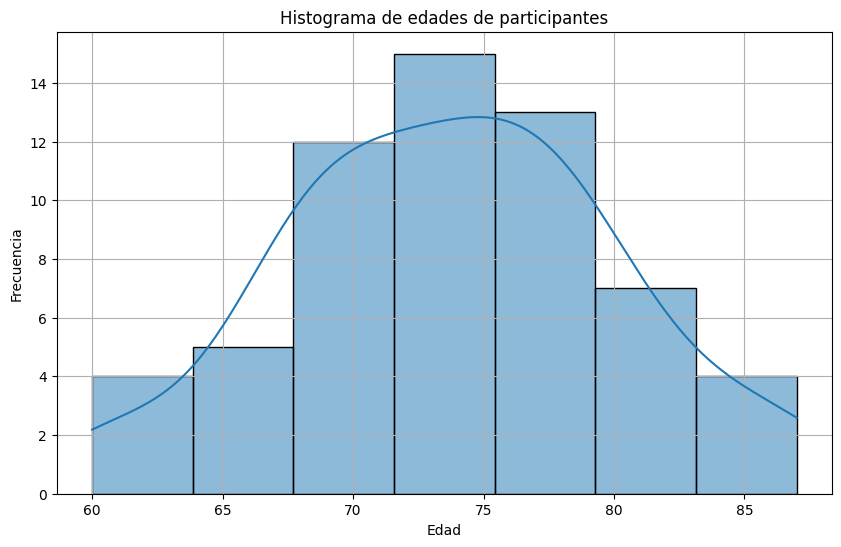

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['EdadC4'], bins=7, kde=True)
plt.title('Histograma de edades de participantes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

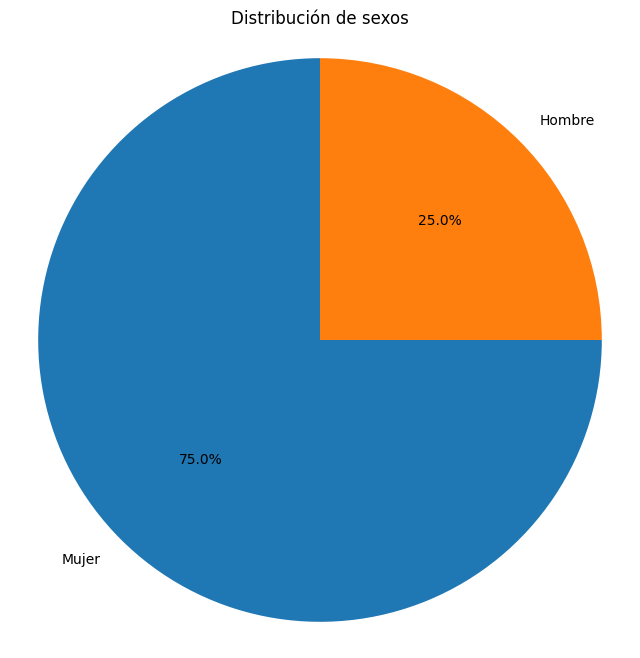

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(df['SexoC6'].value_counts(), labels=df['SexoC6'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de sexos')
plt.axis('equal')
plt.show()

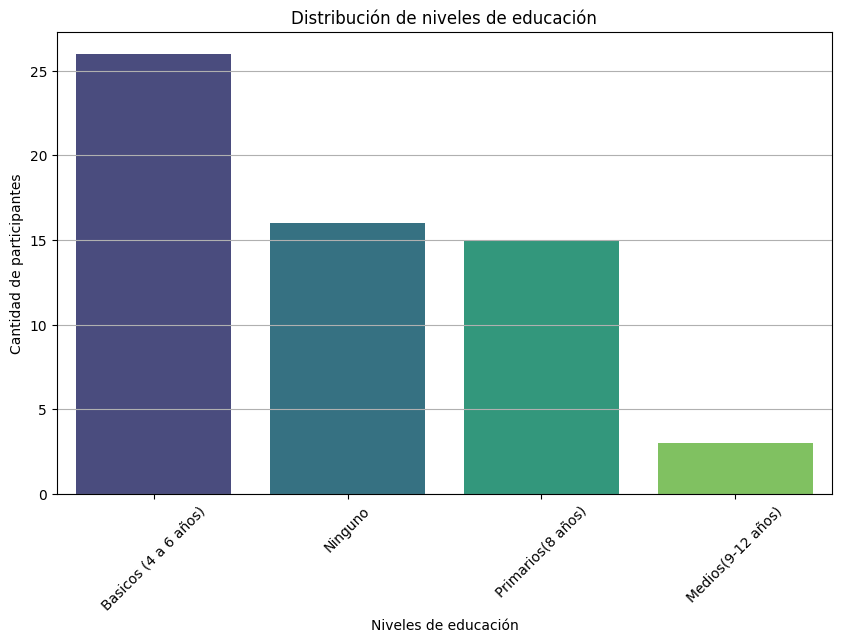

In [ ]:
conteos_educacion = df['AosDeEstudC15'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=conteos_educacion.index, y=conteos_educacion.values, hue=conteos_educacion.index, palette='viridis', legend=False)
plt.title('Distribución de niveles de educación')
plt.xlabel('Niveles de educación')
plt.ylabel('Cantidad de participantes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

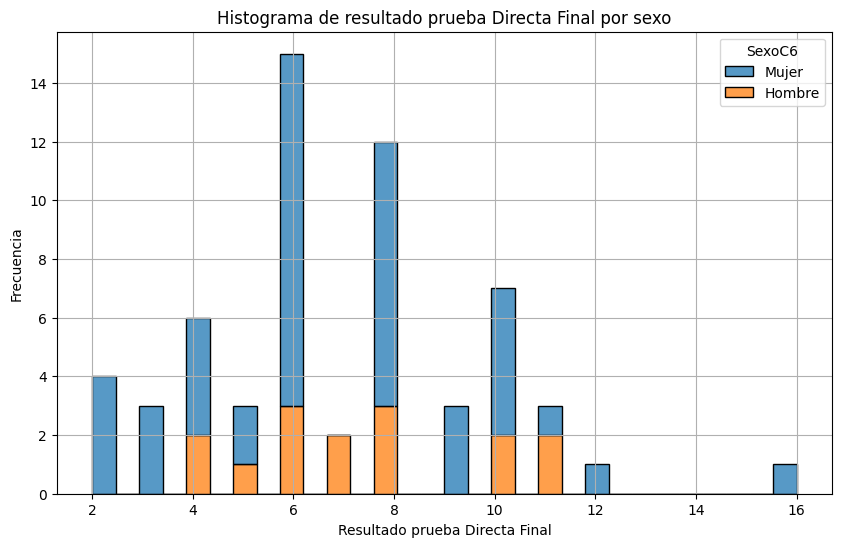

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='ResultadoDC128', hue='SexoC6', multiple='stack', bins=30)
plt.title('Histograma de resultado prueba Directa Final por sexo')
plt.xlabel('Resultado prueba Directa Final')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

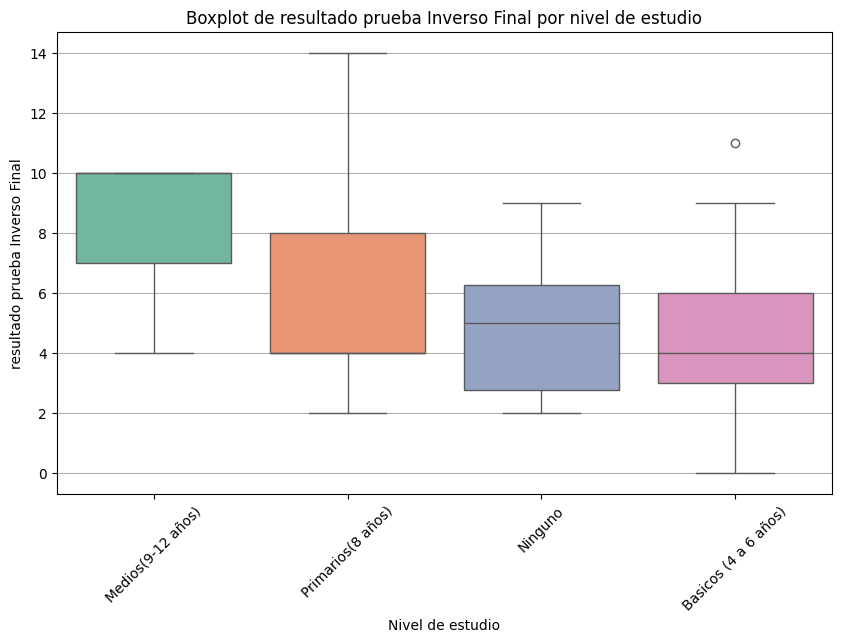

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='AosDeEstudC15', y='ResultadoIC150', hue='AosDeEstudC15', palette='Set2', legend=False)
plt.title('Boxplot de resultado prueba Inverso Final por nivel de estudio')
plt.xlabel('Nivel de estudio')
plt.ylabel('resultado prueba Inverso Final')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

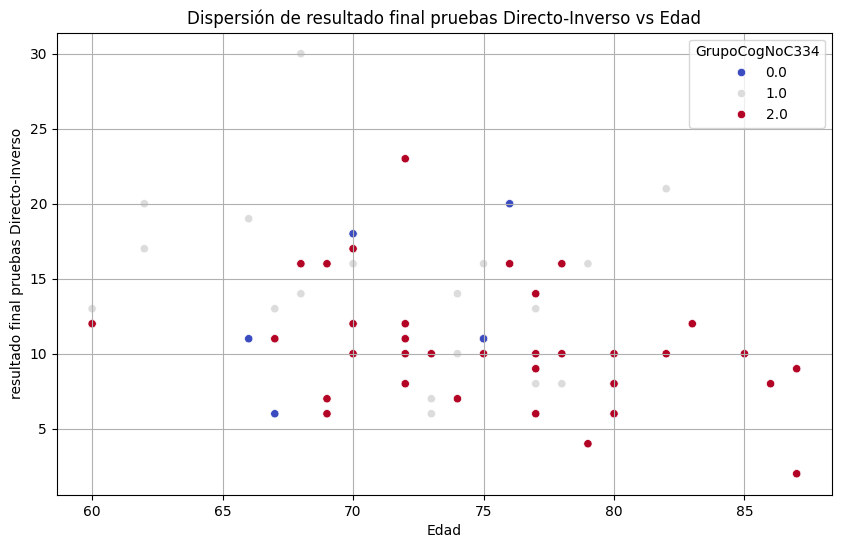

In [ ]:
# GrupoCogNoC334 = Grupo Cognitivo(0:Desconocido, 1:No-Demencia, 2:Demencia)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='EdadC4', y='ResultadoFC151', hue='GrupoCogNoC334', palette='coolwarm')
plt.title('Dispersión de resultado final pruebas Directo-Inverso vs Edad')
plt.xlabel('Edad')
plt.ylabel('resultado final pruebas Directo-Inverso')
plt.grid()
plt.show()

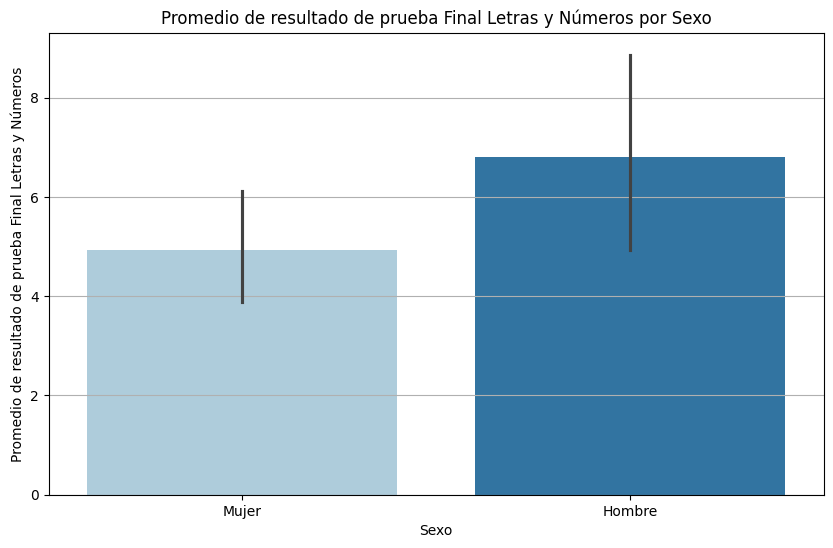

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='SexoC6', y='ResultadoFC180', hue='SexoC6', palette='Paired', legend=False)
plt.title('Promedio de resultado de prueba Final Letras y Números por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Promedio de resultado de prueba Final Letras y Números')
plt.grid(axis='y')
plt.show()

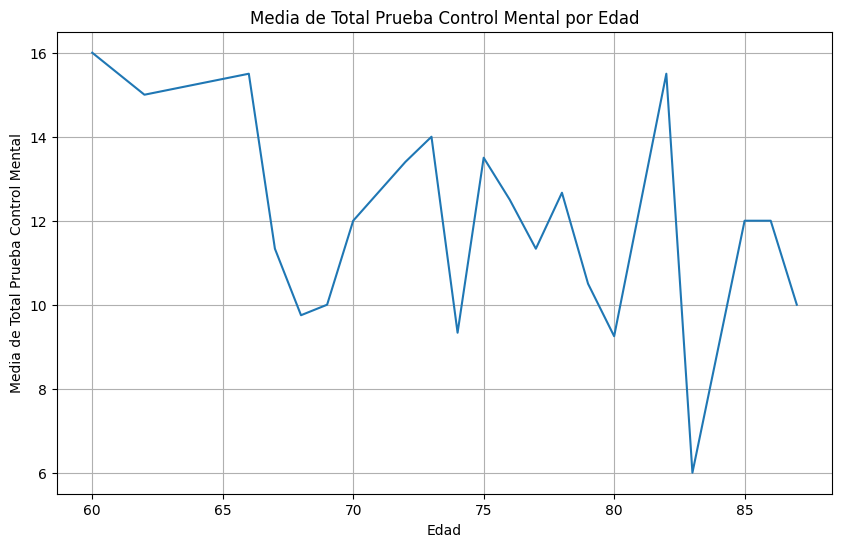

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='EdadC4', y='TotalPContC213', estimator='mean', errorbar=None)
plt.title('Media de Total Prueba Control Mental por Edad')
plt.xlabel('Edad')
plt.ylabel('Media de Total Prueba Control Mental')
plt.grid()
plt.show()

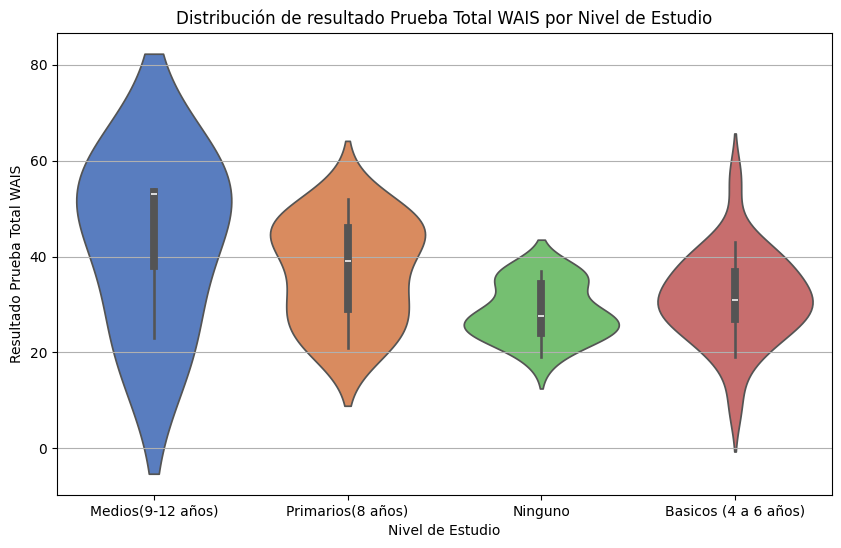

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='AosDeEstudC15', y='TotalWaisC215', hue='AosDeEstudC15', palette='muted', legend=False)
plt.title('Distribución de resultado Prueba Total WAIS por Nivel de Estudio')
plt.xlabel('Nivel de Estudio')
plt.ylabel('Resultado Prueba Total WAIS')
plt.grid(axis='y')
plt.show()

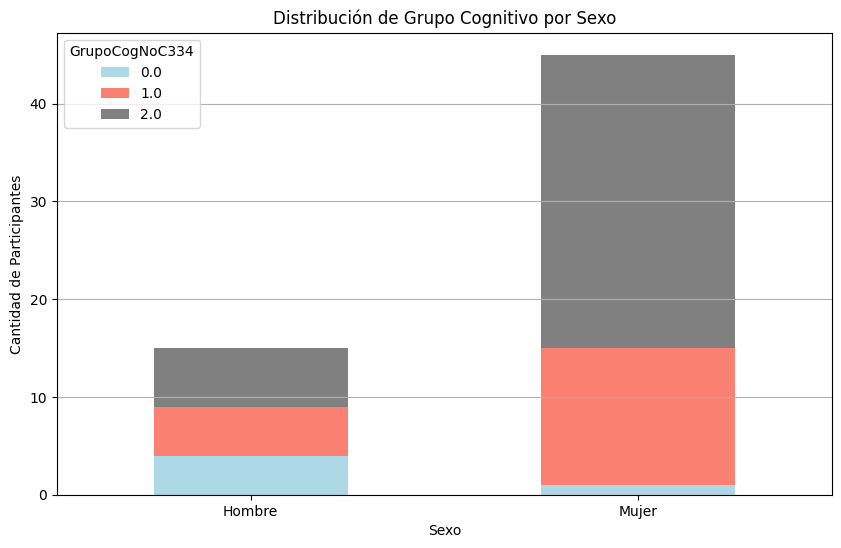

In [ ]:
grouped = df.groupby(['SexoC6', 'GrupoCogNoC334']).size().unstack()
grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'salmon', 'gray'])
plt.title('Distribución de Grupo Cognitivo por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de Participantes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

<hr>
<center><b>ENTRENAR EL ALGORITMO</b></center>

In [ ]:
# Desde C16 - C215 correspondientes a Prueba WAIS:
x_cols = []
cont = 16
for col in df.columns:
  if f'C{cont}' in col and cont <= 215:
    cont += 1
    x_cols.append(col)


x_cols.append('ResultadoDC327') # RESULTADO DIRECTO FINAL .1
x_cols.append('ResultadoIC328') # RESULTADO INVERSO FINAL.1
x_cols.append('ResultadoFC329') # RESULTADO FINAL DIRECTO-INVERSO.1
x_cols.append('ResultadoFC330') # RESULTADO FINAL LETRAS Y NUMEROS.1
x_cols.append('TotalPContC331') # TotalPContC331: TOTAL_P_CONT_MENTAL.1
x_cols.append('TotalWaisC332') # TOTAL WAIS.1

In [ ]:
print(df.EdadC4.unique())
print(df.SexoC6.unique())
print(df.AosDeEstudC15.unique())
print(df.QuPruebaTeC89.unique()) # Remover de variables independientes.
print(df.QuPruebaTeC90.unique()) # Remover de variables independientes.
print(df.AadirasAlgC102.unique())

x_cols.append('EdadC4')
x_cols.remove('QuPruebaTeC89')
x_cols.remove('QuPruebaTeC90')

[66 78 73 70 67 62 82 75 76 80 60 77 83 68 86 74 69 79 87 72 85]
['Mujer' 'Hombre']
['Medios(9-12 años)' 'Primarios(8 años)' 'Ninguno' 'Basicos (4 a 6 años)']
['COLORES']
['COLORES']
['SI' 'NO']


In [ ]:
# Definir Variables Dependiente e Independientes:
X = df[x_cols]
y = df["GrupoCogNoC334"] # GrupoCogNoC334: GRUPO-COG(+68/1:no-demencia;-68/2:demencia)

In [ ]:
# Transformar las Columnas:
label_encoder = LabelEncoder()

X.loc[:, 'SexoC6'] = label_encoder.fit_transform(df['SexoC6'])
X.loc[:, 'AosDeEstudC15'] = label_encoder.fit_transform(df['AosDeEstudC15'])
X.loc[:, 'AadirasAlgC102'] = label_encoder.fit_transform(X['AadirasAlgC102'])

In [ ]:
# Dividir los Datos en Conjuntos de Entrenamiento y Prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Entrenar el Modelo:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Hacer Predicciones:
y_pred = model.predict(X_test)

<hr>
<center><b>EVALUAR EL ALGORITMO</b></center>

In [ ]:
# Evaluar el Modelo:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2: {r2}')

Mean Squared Error: 0.3333333333333333
R^2: -0.4999999999999998


In [ ]:
dic_datos = get_dic_datos([dic_datos[i] for i in df.columns])
len(dic_datos)

df_dic = pd.DataFrame(list(dic_datos.items()), columns=['Nombre', 'Descripción'])


with pd.ExcelWriter('datosLimpios.xlsx') as writer:
    df.to_excel(writer, sheet_name='Datos', index=False)
    df_dic.to_excel(writer, sheet_name='Diccionario', index=False)